In [1]:
#Gabi Rivera
#ADS500B
#06Aug2022

#Module 6 Assignment

#Question 1
#import libraries

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
#check current folder or location

%pwd

'/Users/gabirivera/Desktop/MSADS1/ADS500B/Module6'

In [3]:
#import airline_cost.csv file

ac = pd.read_csv('airline_costs.csv', sep = ',')
ac.head(5)

,Airline,FlightLength,PlaneSpeed,DailyFlightTime,CustomersServed,TotalOperatingCost,Revenue,LoadFactor,AvailableCapacity,TotalAssets,Investments,AdjustedAssets
0,All-American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [4]:
#general ac information so see NAs, Dtype, records, and variables

ac.info()

#observations:
    #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             31 non-null     object 
 1   FlightLength        31 non-null     int64  
 2   PlaneSpeed          31 non-null     int64  
 3   DailyFlightTime     31 non-null     float64
 4   CustomersServed     31 non-null     int64  
 5   TotalOperatingCost  31 non-null     float64
 6   Revenue             31 non-null     float64
 7   LoadFactor          31 non-null     float64
 8   AvailableCapacity   31 non-null     float64
 9   TotalAssets         31 non-null     float64
 10  Investments         31 non-null     float64
 11  AdjustedAssets      31 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 3.0+ KB


In [5]:
#general measures of distributions
    #note to assess only variables that are numerical or continous
    
ac.loc[:,['FlightLength', 'DailyFlightTime', 'CustomersServed', 'TotalAssets']].describe()

,FlightLength,DailyFlightTime,CustomersServed,TotalAssets
count,31.000000,31.000000,31.000000,31.000000
mean,129.096774,6.463226,14491.967742,215.310968
std,73.212638,1.549586,16824.247836,402.655569
min,45.000000,2.350000,183.000000,2.030000
25%,71.000000,5.865000,2500.000000,13.230000
50%,100.000000,6.600000,6500.000000,21.600000
75%,174.500000,7.260000,19100.000000,167.310000
max,293.000000,9.500000,56928.000000,1436.530000


In [6]:
#determine median of the following variables to assess measure of centralities
    #Length of flight in miles
    #Daily flight time per plane in hours
    #Customers served in 1000s
    #Total assets in $100,000s

print('Median flight length, mi =', ac['FlightLength'].median(), 
      '\nMedian daily flight time, hrs =', ac['DailyFlightTime'].median(),
     '\nMedian customers served =', ac['CustomersServed'].median(),
     '\nMedian total assets =', ac['TotalAssets'].median())

#Measure of centrality observations:
    #Flight Length = slight positively skewed
    #Daily Flight Time = normally distributed
    #Customers Served = positively skewed
    #Total Assets = positively skewed

Median flight length, mi = 100.0 
Median daily flight time, hrs = 6.6 
Median customers served = 6500.0 
Median total assets = 21.6


In [7]:
#determine correlation of variables to each other
    #note to assess only variables that are numerical or continous
    
ac.loc[:,['FlightLength', 'DailyFlightTime', 'CustomersServed', 'TotalAssets']].corr()

,FlightLength,DailyFlightTime,CustomersServed,TotalAssets
FlightLength,1.000000,0.478035,0.788239,0.806172
DailyFlightTime,0.478035,1.000000,0.361647,0.275244
CustomersServed,0.788239,0.361647,1.000000,0.904802
TotalAssets,0.806172,0.275244,0.904802,1.000000


In [8]:
#Model to predict number of customers by flight length (mi) and dailty flight time per plane (hrs)

fd = (smf.ols(formula='CustomersServed ~ FlightLength + DailyFlightTime', data = ac)).fit()
fd.summary()

#CustomersServed = -7792.07 + 183.30*FlightLength - 213.33*DailyFlightTime

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CustomersServed   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.23e-06
Time:                        19:05:15   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7792.0706   8396.998     -0.928      0.361    -2.5e+04    9408.401
FlightLength      183.2956     30.414      6.027      0.000     120.995     245.596
DailyFlightTime  -213.3340   1436.955     -0.148      0.883   -3156.803    2730.134
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.851
Skew:                           0.598   Prob(JB):                        0.396
Kurtosis:                       2.931   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

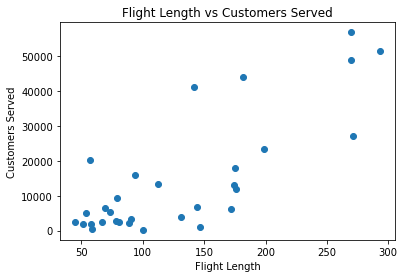

In [9]:
#Plot Customers Served and Flight Length

plt.scatter(ac['FlightLength'],ac['CustomersServed'])
plt.title('Flight Length vs Customers Served')
plt.xlabel('Flight Length')     
plt.ylabel('Customers Served')           
plt.show()

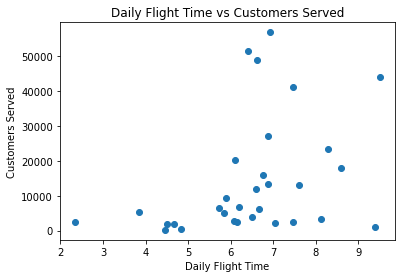

In [10]:
#Plot Customers Served and Daily Flight Time

plt.scatter(ac['DailyFlightTime'],ac['CustomersServed'])
plt.title('Daily Flight Time vs Customers Served')
plt.xlabel('Daily Flight Time')     
plt.ylabel('Customers Served')           
plt.show()

In [11]:
#Model to predict the total assets of an airline from the customers served

CS = sm.add_constant(ac['CustomersServed'])
tol_a = (sm.OLS(ac['TotalAssets'], CS)).fit()
tol_a.summary()

#TotalAssets = -98.51 + 0.02*CustomersServed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalAssets   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           2.85e-12
Time:                        19:05:19   Log-Likelihood:                -202.95
No. Observations:                  31   AIC:                             409.9
Df Residuals:                      29   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -98.5080     41.633     -2.366      0.025    -183.656     -13.360
CustomersServed     0.0217      0.002     11.442      0.000       0.018       0.026
==============================================================================
Omnibus:                       18.279   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.501
Skew:                          -1.486   Prob(JB):                     4.78e-06
Kurtosis:                       6.183   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

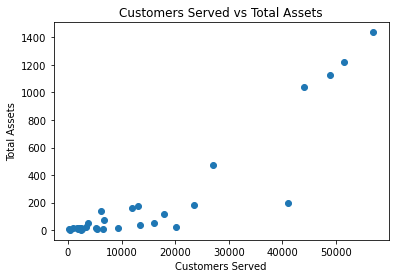

In [12]:
# Plot Total Assets and Customers Served

plt.scatter(ac['CustomersServed'],ac['TotalAssets'])
plt.title('Customers Served vs Total Assets')
plt.xlabel('Customers Served')     
plt.ylabel('Total Assets')           
plt.show()